Cap Recognizer

In [1]:
#|default_exp app

In [2]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

In [3]:
from fastai.vision.all import *

In [4]:
#|export
from fastai.vision.all import load_learner
import gradio as gr

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/BirdRecognizer

/content/drive/MyDrive/BirdRecognizer


In [8]:
#|export
model = load_learner('models/cap-recognizer-v2.pkl')

In [9]:
#|export
bird_names = ('Crow',
              'Duck',
              'Eagle',
              'Flamingo',
              'Hawk',
              'Hornbill',
              'Hummingbird',
              'Kingfisher',
              'Owl', 'Parrot',
              'Peacock',
              'Pelican',
              'Penguin',
              'Pigeon',
              'Robin',
              'Seagull',
              'Sparrow',
              'Stork',
              'Swallow',
              'Woodpecker')
def recognize_image(image):
  pred, idx, probs = model.predict(image)
  print(pred, probs)
  return dict(zip(bird_names, map(float, probs)))


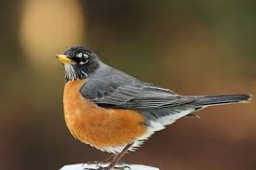

In [10]:
img = PILImage.create(f'test_images/firstpic.jpeg')
img.thumbnail((256,256))
img

In [11]:
recognize_image(img)

Robin tensor([8.3996e-06, 4.8062e-07, 1.9379e-05, 5.0051e-07, 3.0805e-06, 6.2299e-07,
        3.4269e-06, 5.0227e-06, 3.2201e-06, 4.3835e-06, 2.1984e-06, 1.3335e-06,
        1.1260e-06, 2.3892e-06, 9.9968e-01, 3.4951e-06, 2.4613e-04, 9.5088e-06,
        3.0790e-06, 1.9469e-07])


{'Crow': 8.399621037824545e-06,
 'Duck': 4.806205993190815e-07,
 'Eagle': 1.9379220248083584e-05,
 'Flamingo': 5.00508974710101e-07,
 'Hawk': 3.0804999369138386e-06,
 'Hornbill': 6.229909104149556e-07,
 'Hummingbird': 3.4268523450009525e-06,
 'Kingfisher': 5.022736331738997e-06,
 'Owl': 3.220117150704027e-06,
 'Parrot': 4.383507985039614e-06,
 'Peacock': 2.1984162685839692e-06,
 'Pelican': 1.3335112498680246e-06,
 'Penguin': 1.1260099199716933e-06,
 'Pigeon': 2.3892071112641133e-06,
 'Robin': 0.9996820688247681,
 'Seagull': 3.495110604490037e-06,
 'Sparrow': 0.00024612879496999085,
 'Stork': 9.50879075389821e-06,
 'Swallow': 3.0789872198511148e-06,
 'Woodpecker': 1.94690429111688e-07}

In [ ]:
#!export
image = gr.inputs.Image(width=250, height=250)
label = gr.outputs.Label()
examples = [
    'test_images/firstpic.jpeg',
    'test_images/secondpic.jpg',
    'test_images/thirdpic.jpeg',
    'test_images/fourthpic.jpeg',
    'test_images/fifthpic.jpeg']


iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples = examples)
iface.launch(inline=False,share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://875e6177686533fb7e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Notebook to Python Script Export


In [ ]:
from nbdev.export import notebook2script
notebook2script('app.ipynb')

ImportError: cannot import name 'notebook2script' from 'nbdev.export' (/usr/local/lib/python3.11/dist-packages/nbdev/export.py)